In [27]:
import pandas as pd

# Load the provided Excel file to extract the necessary parameters
file_path = '/content/Wet rotor project.xlsx'
data = pd.read_excel(file_path)

In [35]:
data.column = ['parameter', 'value']
#data = data[1:]

<ipython-input-35-7e06bc1bb061>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.column = ['parameter', 'value']


In [36]:
print("\nCleaned Data:")
print(data.head())


Cleaned Data:
     Parameters  Unnamed: 1
2      Rotor OD       46.50
3     Stator ID       48.00
4  Rotor Length       36.25
5     Shaft Dia       13.00
6           NaN         NaN


In [37]:
# Display the initial structure of the data
print("Initial Data:")
print(data.head())

# Rename the 'Unnamed: 1' column to 'Value'
data.columns = ['Parameters', 'Value']

# Drop rows where both 'Parameters' and 'Value' are NaN
data.dropna(how='all', inplace=True)

# Reset the index to clean up after dropping rows
data.reset_index(drop=True, inplace=True)

# Display the cleaned and renamed data
print("\nCleaned Data:")
print(data)

Initial Data:
     Parameters  Unnamed: 1
2      Rotor OD       46.50
3     Stator ID       48.00
4  Rotor Length       36.25
5     Shaft Dia       13.00
6           NaN         NaN

Cleaned Data:
                                          Parameters  Value
0                                           Rotor OD  46.50
1                                          Stator ID  48.00
2                                       Rotor Length  36.25
3                                          Shaft Dia  13.00
4                                       Description:    NaN
5  The rotor will be in a water/glycol mix at les...    NaN
6  We would also like the system modeled with a 1...    NaN


<ipython-input-37-55dbfefd496b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all', inplace=True)


In [38]:
data.head()

,Parameters,Value
0,Rotor OD,46.50
1,Stator ID,48.00
2,Rotor Length,36.25
3,Shaft Dia,13.00
4,Description:,NaN


In [40]:
data

,Parameters,Value
0,Rotor OD,46.50
1,Stator ID,48.00
2,Rotor Length,36.25
3,Shaft Dia,13.00
4,Description:,NaN
5,The rotor will be in a water/glycol mix at les...,NaN
6,We would also like the system modeled with a 1...,NaN


In [41]:
data = data.drop(data.index[4:], axis=0)

In [42]:
data

,Parameters,Value
0,Rotor OD,46.50
1,Stator ID,48.00
2,Rotor Length,36.25
3,Shaft Dia,13.00


In [43]:
import numpy as np

# Given parameters
rotor_od = 46.50 / 1000  # Rotor OD in meters
stator_id = 48.00 / 1000  # Stator ID in meters
rotor_length = 36.25 / 1000  # Rotor Length in meters
rpm = 5000  # Motor speed in RPM
air_gaps = [stator_id - rotor_od, 0.001, 0.002]  # Different air gaps in meters

# Fluid properties (for water)
rho = 1000  # Density in kg/m^3
mu = 0.001  # Dynamic viscosity in Pa.s

# Convert RPM to rad/s
omega = rpm * (2 * np.pi / 60)  # Angular velocity in rad/s

# Calculate projected area (A) of the rotor (cylindrical surface)
area = np.pi * rotor_od * rotor_length  # Projected area in m^2

# Analytical drag torque calculation for different air gaps
drag_torque_results = {}
for gap in air_gaps:
    # Estimate relative velocity at the rotor surface (v = omega * r)
    velocity = omega * (rotor_od / 2)  # Relative velocity in m/s

    # Calculate drag force per unit area using a simplified approximation
    shear_stress = mu * velocity / gap  # Shear stress (Pa)
    drag_force = shear_stress * area  # Drag force in N

    # Drag torque (T = F * r)
    drag_torque = drag_force * (rotor_od / 2)  # Torque in Nm

    drag_torque_results[gap] = drag_torque

drag_torque_results


{0.0015000000000000013: 0.0009992268933600855,
 0.001: 0.0014988403400401297,
 0.002: 0.0007494201700200649}

In [44]:
drag_torque_results  # Display the calculated results from the previous cell

{
    list(drag_torque_results.keys())[0]: drag_torque_results[list(drag_torque_results.keys())[0]],  # Actual air gap (in meters)
    list(drag_torque_results.keys())[1]: drag_torque_results[list(drag_torque_results.keys())[1]],   # Increased air gap (in meters)
    list(drag_torque_results.keys())[2]: drag_torque_results[list(drag_torque_results.keys())[2]]    # Further increased air gap (in meters)
}

{0.0015000000000000013: 0.0009992268933600855,
 0.001: 0.0014988403400401297,
 0.002: 0.0007494201700200649}

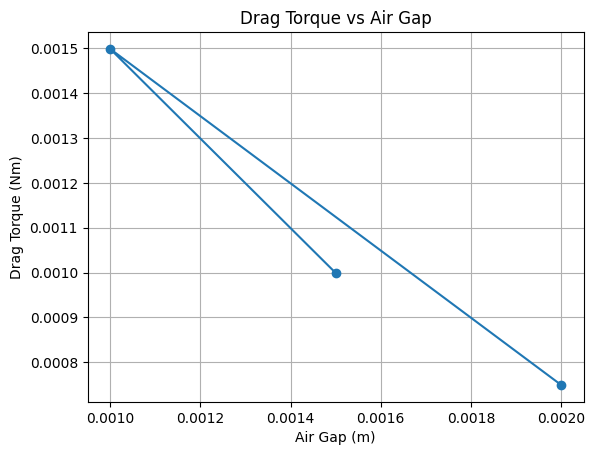

In [45]:
import matplotlib.pyplot as plt

# Plotting the results
gaps = list(drag_torque_results.keys())
torques = list(drag_torque_results.values())

plt.plot(gaps, torques, marker='o')
plt.xlabel('Air Gap (m)')
plt.ylabel('Drag Torque (Nm)')
plt.title('Drag Torque vs Air Gap')
plt.grid(True)
plt.show()


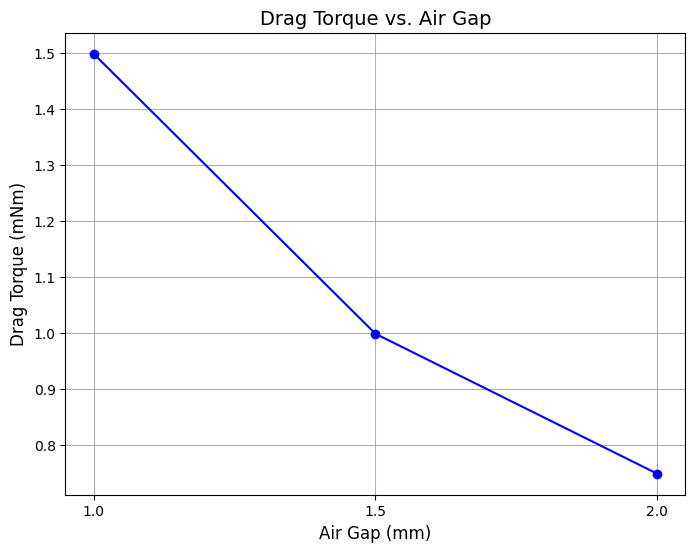

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Given drag torque results
drag_torque_results = {
    0.0015: 0.0009992268933600855,
    0.001: 0.0014988403400401297,
    0.002: 0.0007494201700200649
}

# Sort the data by air gap
air_gaps = np.array(sorted(drag_torque_results.keys())) * 1000  # Convert to mm for better readability
torques = np.array([drag_torque_results[gap/1000] for gap in air_gaps])

# Create the plot
plt.figure(figsize=(8,6))
plt.plot(air_gaps, torques*1000, marker='o', linestyle='-', color='b')  # Torque in mNm
plt.xlabel('Air Gap (mm)', fontsize=12)
plt.ylabel('Drag Torque (mNm)', fontsize=12)
plt.title('Drag Torque vs. Air Gap', fontsize=14)
plt.grid(True)
plt.xticks(air_gaps)
plt.show()
